<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**資料檢視**

**新增validation set**

In [0]:
x_valid=x_train[:6000]/255

In [0]:
y_valid=y_train[:6000]

In [0]:
x_train_new=x_train[6000:]/255

In [0]:
y_train_new=y_train[6000:]

**建立model**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

**新增Flatten layer，讓輸入的影像成為1D 28X28矩陣**

In [0]:
model.add(Flatten(input_shape=[28,28]))

**改變模型的層數跟神經元數**

In [0]:
model.add(Dense(500,activation="relu"))


In [0]:
model.add(Dense(300,activation="relu"))


In [0]:
model.add(Dense(100,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


**改變loss從mse變成sparse_categorical_crossentropy:**
loss不採取mse而使用sparese_categorical_crossentropy。此常用於類別相關辨識。不用categorical_crossentropy主要是因為要辨識的物件不是one-hot encoded。

**改變optimizer從SGD變成adam:**
adam為目前常使用的optimizer之一，能使學習率有個固定範圍，讓參數更新較平穩

**改變learning rate:**

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.1),
              metrics=['accuracy'])

**改變batch size跟epochs且增加validation data檢驗**

In [82]:
response=model.fit(x_train_new,y_train_new,batch_size=50,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1080/1080 [==============================] - 2s 2ms/step - loss: 8.1004 - accuracy: 0.0987 - val_loss: 2.3044 - val_accuracy: 0.1072
Epoch 2/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3129 - accuracy: 0.1020 - val_loss: 2.3164 - val_accuracy: 0.1013
Epoch 3/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3127 - accuracy: 0.0963 - val_loss: 2.3077 - val_accuracy: 0.0983
Epoch 4/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3136 - accuracy: 0.1013 - val_loss: 2.3169 - val_accuracy: 0.0933
Epoch 5/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3125 - accuracy: 0.1012 - val_loss: 2.3073 - val_accuracy: 0.1013
Epoch 6/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3126 - accuracy: 0.0999 - val_loss: 2.3104 - val_accuracy: 0.0973
Epoch 7/30
1080/1080 [==============================] - 2s 2ms/step - loss: 2.3134 - accuracy: 0.0985 - val_loss: 2.3140 - val_accuracy:

In [0]:
import pandas as pd

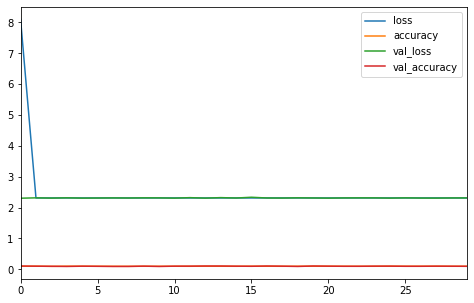

In [83]:
pd.DataFrame(response.history).plot(figsize=(8,5))

In [84]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 11.6691 - accuracy: 0.1000


[11.66913890838623, 0.10000000149011612]

In [85]:
result=model.predict_classes(x_test)
result

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 4, 4, ..., 4, 4, 4])

神經網路預測是： Coat


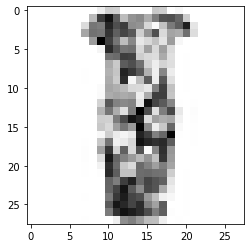

In [86]:
n=100
print('神經網路預測是：',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')